### Phân tích cú pháp: Bài thực hành trên lớp

Bài 2: chương trình minh hoạ kiểm lỗi cú pháp tiếng Anh đơn giản

1) Cài đặt thư viện liên quan
    
    - Cài đặt thư viện Stanford NLPCore
    
    Yêu cầu có cài đặt Java SDK vì bộ thư viện Stanford NLPCore code Java, file chạy .jar

    - import bộ phân tích cú pháp CoreNLPParser

2)  Phân tích cú pháp cho câu và khảo sát  cây cú pháp

a) gọi phân tích cú pháp

b) view cây

3) Qui tắc kiểm lỗi cú pháp

-	Ví dụ về Qui tắc agreement giữa Subject – Verb

-	Kiểm lỗi và đưa ra loại lỗi



In [13]:
import wget
url = 'https://nlp.stanford.edu/software/stanford-corenlp-4.5.5.zip'
wget.download(url)

KeyboardInterrupt: 

In [2]:
import zipfile
with zipfile.ZipFile("stanford-corenlp-4.5.5.zip", 'r') as zip_ref:
    zip_ref.extractall("stanford-corenlp-4.5.5")

In [14]:
import os

# Đường dẫn tới thư mục JDK
java_path = "C:\\Program Files\\Java\\jdk-20\\bin\\java.exe"

# Đường dẫn tới thư mục CoreNLP
corenlp_path = os.path.abspath("stanford-corenlp-4.5.5")


In [16]:
print(os.environ['JAVA_HOME'])


C:\Program Files\Java\jdk-20


In [17]:
# Cài đặt java JDK nếu chưa có (https://www.oracle.com/java/technologies/javase-downloads.html)

#Thêm biến môi trường
import os
java_path = "C:\\Program Files\\Java\\jdk-20\\bin" #replace directory by your directory
os.environ['JAVAHOME'] = java_path

import nltk
nltk.internals.config_java(java_path) #replace directory by your directory

In [18]:
import os
import ctypes
from ctypes.util import find_library

# Cài đặt các gói Python cần thiết
os.system('pip install ghostscript')
os.system('pip install "camelot-py[cv]"')
os.system('pip install excalibur-py')

# Kiểm tra thư viện Ghostscript
gs_lib = find_library("gs")
print(gs_lib)  # Nếu Ghostscript được cài đặt thành công, kết quả không phải là None

# Khởi tạo cơ sở dữ liệu Excalibur
os.system('excalibur initdb')


None


1

In [20]:
import os
import subprocess

# Set up môi trường cho CoreNLP
STANFORD = r"C:\Users\Admin\NLPtraining\preprocessing\SyntaxParsing\Syntax Parsing\stanford-corenlp-4.5.5"
print(STANFORD)

# Đảm bảo rằng bạn đã cài đặt đúng Java JDK (JDK 12 chẳng hạn)
java_path = r"C:\Program Files\Java\jdk-20\bin\java.exe"  # Đường dẫn tới java.exe

# Lệnh khởi động CoreNLP Server
corenlp_cmd = f'"{java_path}" -mx4g -cp "{os.path.join(STANFORD, "stanford-corenlp-4.5.5.jar")};{os.path.join(STANFORD, "stanford-corenlp-4.5.5-models.jar")}" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 15000 -verbose true'

# Khởi động server CoreNLP
process = subprocess.Popen(corenlp_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

stdout, stderr = process.communicate()
if process.returncode == 0:
    print("CoreNLP server đã được khởi động thành công!")
else:
    print(f"Lỗi khi khởi động server: {stderr.decode()}")


C:\Users\Admin\NLPtraining\preprocessing\SyntaxParsing\Syntax Parsing\stanford-corenlp-4.5.5
CoreNLP server đã được khởi động thành công!


In [3]:
from nltk.parse.corenlp import CoreNLPParser

parser = CoreNLPParser(url='http://localhost:9001')
string = "My English instructor was a good teacher."
parse_tree = next(parser.raw_parse(string))

print(parse_tree)
parse_tree.pretty_print()


(ROOT
  (S
    (NP (PRP$ My) (JJ English) (NN instructor))
    (VP (VBD was) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))
                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 My  English instructor was   a      good teacher  . 



In [4]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

In [31]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import requests

try:
    response = requests.get('http://localhost:9001')
    print(response.text)
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")


<head>
  <!-- JQuery -->
  <script src="https://code.jquery.com/jquery-2.1.4.min.js"></script>
  <!-- Bootstrap -->
  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css"/>
  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap-theme.min.css"/>
  <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/js/bootstrap.min.js"></script>
  <!-- Chosen Dropdown Library -->
  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/chosen/1.4.2/chosen.css"/>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/chosen/1.4.2/chosen.jquery.min.js"></script>
  <!-- Brat -->
  <link rel="stylesheet" type="text/css" href="https://nlp.stanford.edu/js/brat/style-vis.css"/>
  <script type="text/javascript" src="https://nlp.stanford.edu/js/brat/client/lib/head.load.min.js"></script>
  <!-- d3 -->
  <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.17/d3.min.js"></script>


(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))
                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 



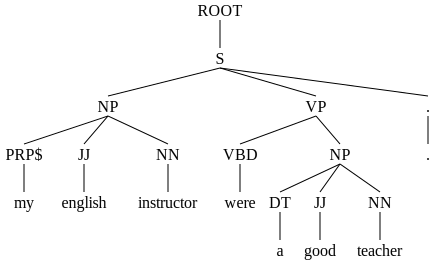

In [6]:
import matplotlib
matplotlib.use('Agg')

def parse_processing(string):
    #Tạo parse tree
    parser = CoreNLPParser(url='http://localhost:9001')
    parse = next(parser.raw_parse(string))

    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse),
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    return tree

string = "My English Instructor were a good teacher."
tree = parse_processing(string)
print(tree)
tree.pretty_print()
tree

In [7]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


In [8]:
# phân tích dependency parsing
from nltk.parse.corenlp import CoreNLPDependencyParser

In [9]:
#string = 'I put the book in the box on the table.'
string = 'I have booked a very nice hotel.'
parser = CoreNLPDependencyParser(url='http://localhost:9001')
parse = next(parser.raw_parse(string))

In [7]:
!pip install svgling

   ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
   ------------------------ --------------- 41.0/67.1 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 67.1/67.1 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


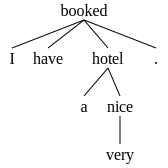

In [10]:
parse.tree()

In [11]:
#sent = 'she love a teacher very much '
#sent = 'actually her friend loves the teacher very much '
#sent = 'she loves'
#sent = 'actually she loves the teacher very much '
sent = 'she want to teach this lecture'
#sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
print(len(tree[0]))
tree.pretty_print()

2
         ROOT                           
          |                              
          S                             
  ________|_____                         
 |              VP                      
 |    __________|____                    
 |   |               S                  
 |   |               |                   
 |   |               VP                 
 |   |     __________|___                
 |   |    |              VP             
 |   |    |      ________|____           
 NP  |    |     |             NP        
 |   |    |     |         ____|_____     
PRP VBP   TO    VB       DT         NN  
 |   |    |     |        |          |    
she want  to  teach     this     lecture



In [12]:

def getNP_VP(tree):
    for i in range(len(tree[0])-1):
        if tree[0][i].label()=='NP' and tree[0][i+1].label()=='VP':
            return tree[0][i], tree[0][i+1]
    return 0,0


In [13]:
NP,VP = getNP_VP(tree)
NP.pretty_print()
VP.pretty_print()

 NP
 |  
PRP
 |  
she

           VP                      
  _________|____                    
 |              S                  
 |              |                   
 |              VP                 
 |     _________|___                
 |    |             VP             
 |    |     ________|____           
 |    |    |             NP        
 |    |    |         ____|_____     
VBP   TO   VB       DT         NN  
 |    |    |        |          |    
want  to teach     this     lecture



In [14]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you
4:  Ngôi thứ 3 số ít: he, she, it
5:   Ngôi thứ 3 số nhiều: they
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''

def get_subject_type(node):
    words = node.leaves()
    if 'i' in words:
        return 1
    elif 'we' in words:
        return 2
    elif 'you' in words:
        return 3
    elif len(set(words).intersection(['he','she','it']))>0:
        return 4
    elif 'they' in words:
        return 5
    else:
        return -1

print(get_subject_type(NP))

4


In [15]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''
vdict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}
def get_verb_type(node):
    for sub in node.subtrees():
        k = sub.label()
        if k in vdict.keys():
            return vdict[k]
    return -1

In [16]:
VP.pretty_print()
get_verb_type(VP)

           VP                      
  _________|____                    
 |              S                  
 |              |                   
 |              VP                 
 |     _________|___                
 |    |             VP             
 |    |     ________|____           
 |    |    |             NP        
 |    |    |         ____|_____     
VBP   TO   VB       DT         NN  
 |    |    |        |          |    
want  to teach     this     lecture



2

In [17]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
match={1:[2],4:[3]}
def check_grammar(sent):
    tree = parse(sent)
    NP,VP = getNP_VP(tree)
    n = get_subject_type(NP)
    v = get_verb_type(VP)
    if n in match.keys():
        if not v in match[n]:
            return 'error'
    return 'ok'

In [19]:
#sent = 'she want to go to school'
sent = 'she want to go to school'
check_grammar(sent)

'error'